# <div align='center'>第8章 非参数统计(2)</div>

In [3]:
%reset -f
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.anova as sma
import statsmodels.formula.api as smf
import statsmodels.stats.api as smt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import patsy
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 8.4 多组数据位置推断

- #### 实验设计中的数据收集原则
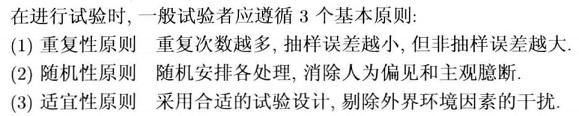

- #### 多总体均值的比较采用方差分析方法
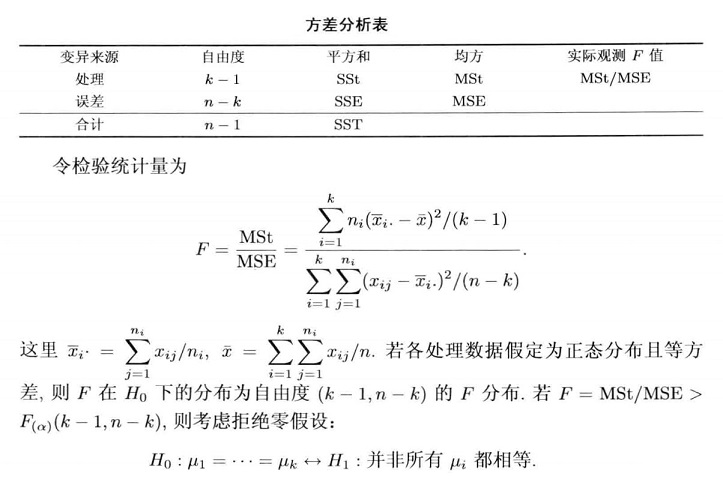

### 8.4.1 Kruskal-Wallis单因素方差分析
- #### 基本原理
Kruskal-Wallis检验是Wilcoxon-Mann-Whitney秩和检验对两组以上样本检验的推广。
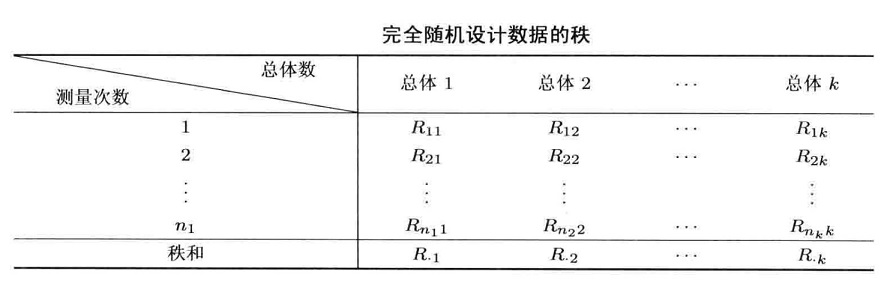

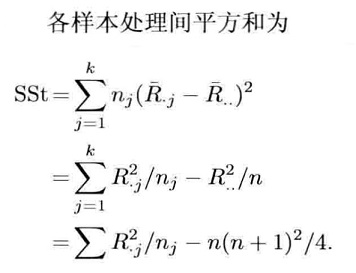


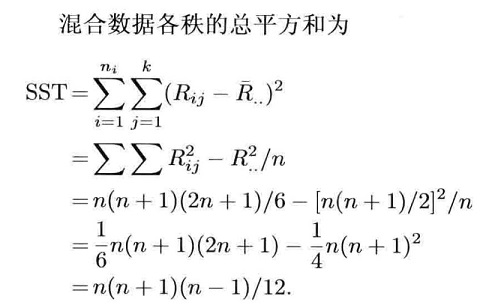

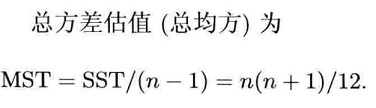

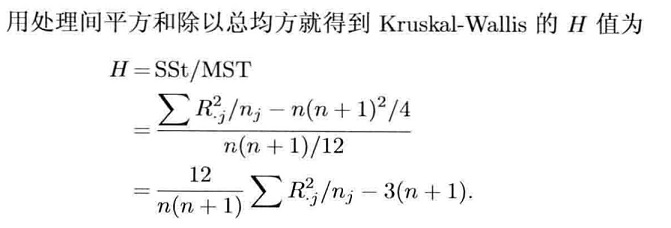

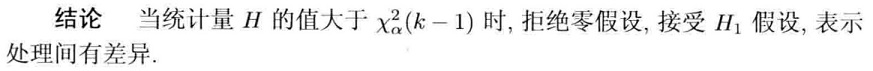



#### 例：
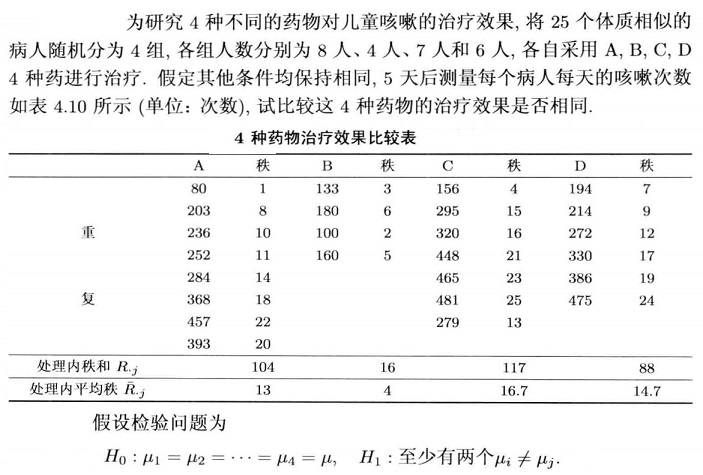

In [4]:
'''
手工编码实现
'''
r1=np.array([1,8,10,11,14,18,22,20])
r2=np.array([3,6,2,5])
r3=np.array([4,15,16,21,23,25,13])
r4=np.array([7,9,12,17,19,24])
n1=len(r1)
n2=len(r2)
n3=len(r3)
n4=len(r4)
n=n1+n2+n3+n4
R1=np.sum(r1)
R2=np.sum(r2)
R3=np.sum(r3)
R4=np.sum(r4)
sst=((R1**2)/n1+(R2**2)/n2+(R3**2)/n3+(R4**2)/n4)-(n*(n+1)**2)/4
mst=n*(n+1)/12
h=sst/mst
chisq_alpha=st.chi2.ppf(0.95,3)
pvalue=st.chi2.sf(h,3)
print('H=%0.8f统计量大于自由度为3，alpha=0.05处的卡方值：%0.8f。'%(h,chisq_alpha))
print('拒绝4种药物疗效相等的原假设。')
print('假设检验的P值为:%0.8f,小于alpha，拒绝原假设。'%pvalue)

H=8.07208791统计量大于自由度为3，alpha=0.05处的卡方值：7.81472790。
拒绝4种药物疗效相等的原假设。
假设检验的P值为:0.04454512,小于alpha，拒绝原假设。


In [5]:
'''
使用Kruskal-Wallis单因素方差分析检验四种药物的疗效是否相同。
结果表明：拒绝疗效相同的原假设。
'''
drug=np.array([80,203,236,252,284,368,457,393,133,180,100,160,156,
               295,320,448,465,481,279,194,214,272,330,386,475])
drugA=np.array([80,203,236,252,284,368,457,393])
drugB=np.array([133,180,100,160])
drugC=np.array([156,295,320,448,465,481,279])
drugD=np.array([194,214,272,330,386,475])
st.kruskal(drugA,drugB,drugC,drugD)

KruskalResult(statistic=8.072087912087923, pvalue=0.04454512424615835)

### 8.4.2 Friedman秩方差分析法
- #### 原理
当数据不符合方差分析的正态性分布前提时，采用Friedman秩方差分析法。
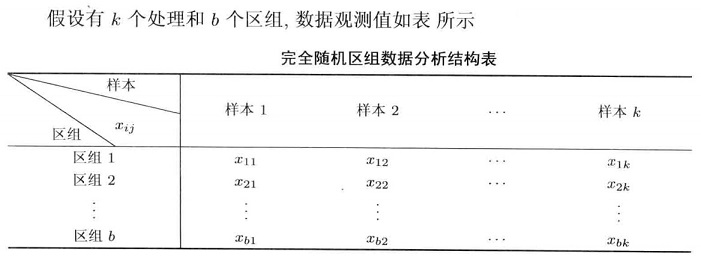
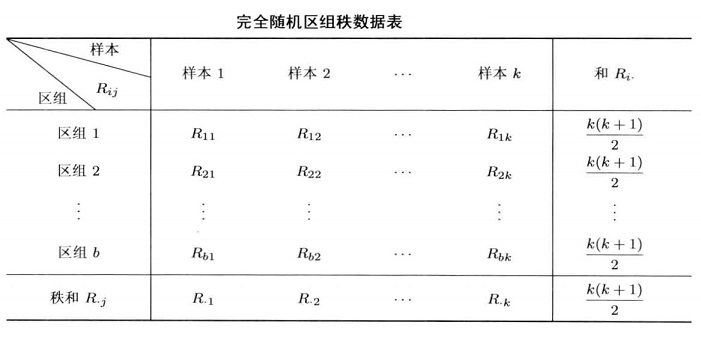
- #### Friedman秩方差统计量$Q和Q_c$
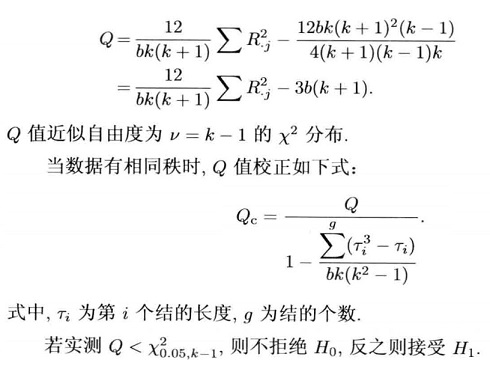

#### 例：
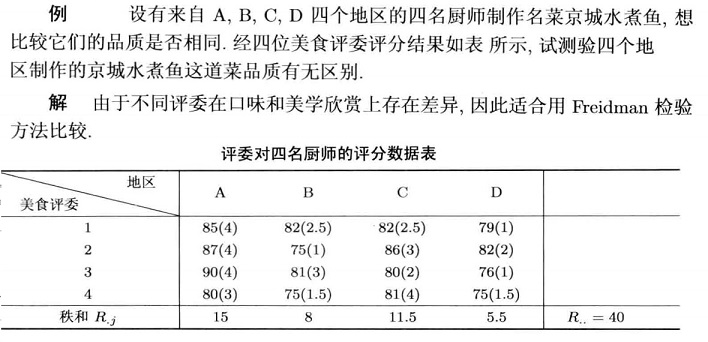
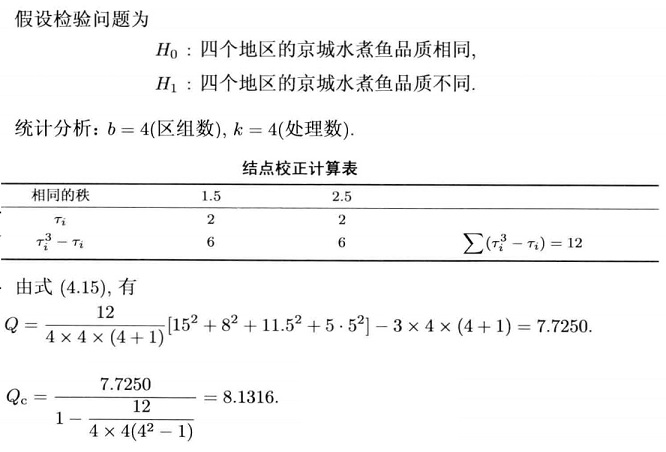
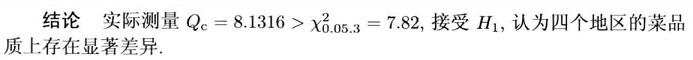

In [6]:
'''
可以按照上述公式计算Q统计量然后进行检验。
Scipy的friedmanchisquare函数有相同功能。
检验结果与上图中的计算结果一致。
'''
a=np.array([85,87,90,80])
b=np.array([82,75,81,75])
c=np.array([82,86,80,81])
d=np.array([79,82,76,75])
st.friedmanchisquare(a,b,c,d),st.chi2.sf(8.131578947368416,3)

(FriedmanchisquareResult(statistic=8.131578947368416, pvalue=0.0433692136979464),
 0.0433692136979464)

### 8.4.3 Hodges-Lehmann检验
又称调整秩和检验，是对Friedman检验的一种补充。用于处理区组数相对较大或处理组相对较小时的情况。比如本例中区组数是8，处理组为4，这种情况下Friedman检验的效果较差，可采用Hodges-Lehmann检验代替。
- #### 调整秩的计算
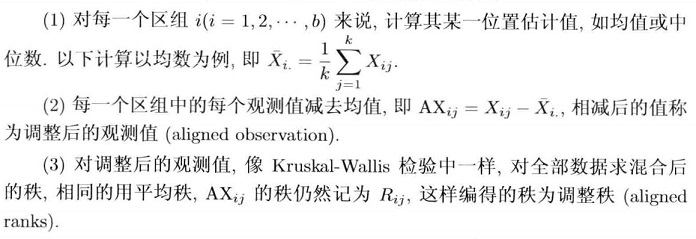
- #### HL检验统计量及其检验
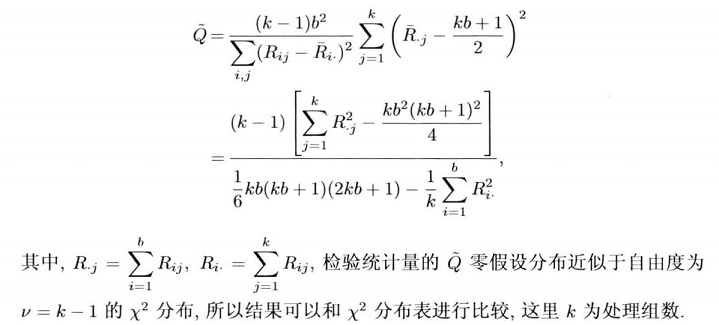
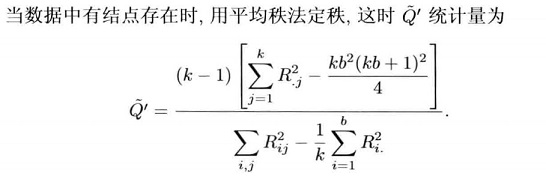

- #### 示例：
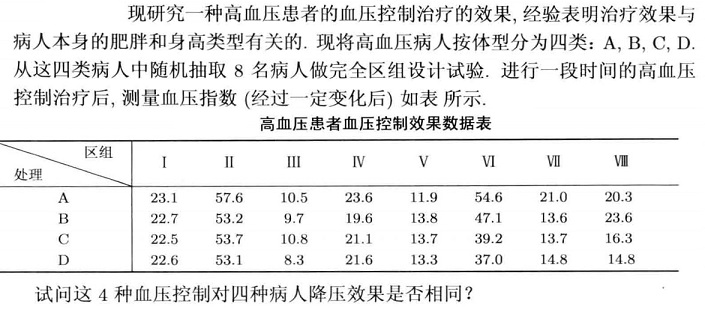

In [7]:
'''
根据上述公式计算HL统计量及其检验的p值。
结果显示HL检验显著，拒绝原假设，说明4种降压药效果不同。
而Friedman检验的p值大于0.05，说明不能拒绝原假设，即4种降压药效果相同。
根据数据的观察，四种降压药的效果还是有差别的，因此Friedman检验在此并不适用。
'''
###HL调整秩计算过程
E=np.array([23.1,57.6,10.5,23.6,11.9,54.6,21.0,20.3])
F=np.array([22.7,53.2,9.7,19.6,13.8,47.1,13.6,23.6])
G=np.array([22.5,53.7,10.8,21.1,13.7,39.2,13.7,16.3])
H=np.array([22.6,53.1,8.3,21.6,13.3,37.0,14.8,14.8])
data=np.vstack([E,F,G,H])
ar_data=data-data.mean(axis=0)
rdata=(st.rankdata(ar_data)).reshape(4,8)

####HL检验计算过程
k=4
b=8
R_i=np.sum(rdata,axis=0)
R_j=np.sum(rdata,axis=1)
###无结点
Q_hat=(k-1)*(np.sum(R_j**2)-(k*b**2*(k*b+1)**2)/4)/ \
      (k*b*(k*b+1)*(2*k*b+1)/6-np.sum(R_i**2)/k)
###有结点
Q_hat1=(k-1)*(np.sum(R_j**2)-(k*(b**2)*(k*b+1)**2)/4)/ \
      (np.sum(rdata**2)-np.sum(R_i**2)/k)
###使用有结点HL统计量Q_hat1进行HL检验
pvalue=st.chi2.sf(Q_hat1,k-1)
print('HL检验统计量：',np.round(Q_hat1,4),'，p值：',np.round(pvalue,5))

###Friedman检验
friedman=st.friedmanchisquare(E,F,G,H)
print('\nFriedman检验统计量：',np.round(friedman.statistic,4),'，p值：',
      np.round(friedman.pvalue,5))

HL检验统计量： 8.5295 ，p值： 0.03625

Friedman检验统计量： 6.45 ，p值： 0.09166


In [8]:
###无结点Q统计量
pvalue1=st.chi2.sf(Q_hat,k-1)
print('HL检验统计量：',np.round(Q_hat,4),'，p值：',np.round(pvalue1,5))

HL检验统计量： 8.5263 ，p值： 0.0363


### 8.4.4 Cochran检验
完全区组设计的特殊情况：观测值只取‘是’或‘否’，1或0等，数据重复量很大，秩方法受到限制。
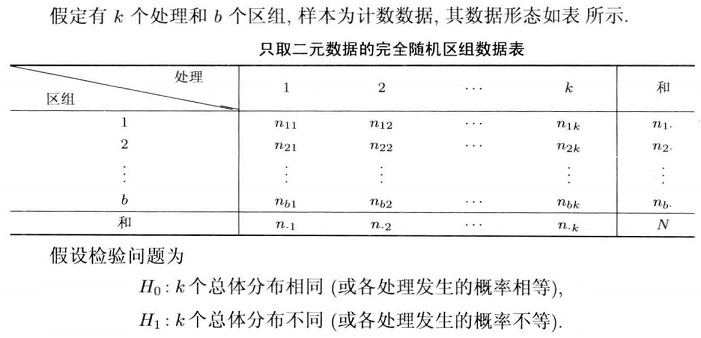

#### 示例：
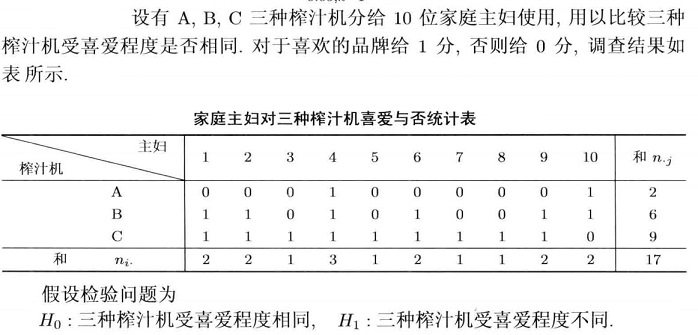

In [9]:
'''
使用StatsModels的cochrans_q函数。
该函数的参数是一个矩阵或多位数组(N,k).
N为样本数，k为变量数。
本例变量数即为榨汁机的种类，参数的shape为(10,3).
由于p值小于0.05，所以拒绝喜爱相同的原假设。
'''
cand1=np.array([0,0,0,1,0,0,0,0,0,1])
cand2=np.array([1,1,0,1,0,1,0,0,1,1])
cand3=np.array([1,1,1,1,1,1,1,1,1,0])
cand=np.vstack([cand1,cand2,cand3])
result=smt.cochrans_q(cand.T)
print('自由度：',result.df,'\n统计量：',np.round(result.statistic,3),
      '\np值：',np.round(result.pvalue,5))

自由度： 2 
统计量： 8.222 
p值： 0.01639


----

## 8.5 分类数据的关联分析
关注变量与变量之间的关系

### 8.5.1 $r\times s$列联表和$\chi^2$独立性检验
- #### 二维列联表
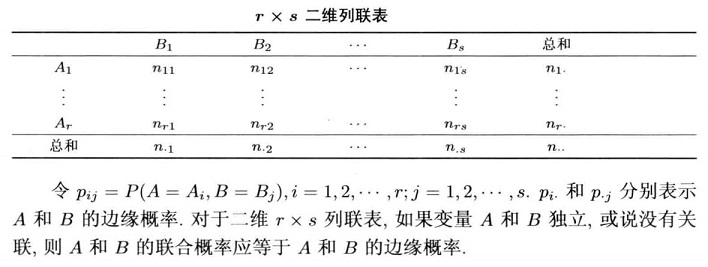
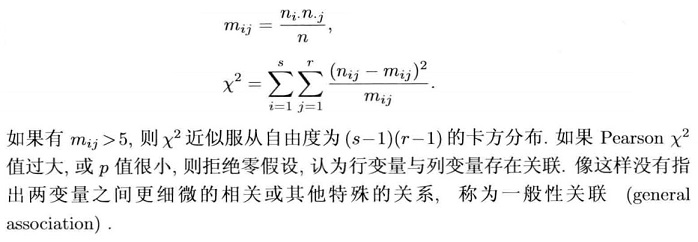
- #### 例：
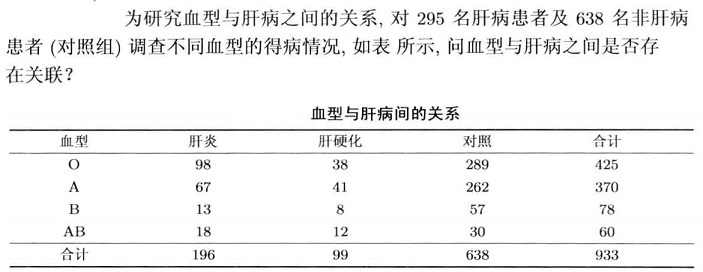

In [10]:
'''
chi2_contingency函数检验两个变量是否有关联关系。
原假设是变量独立。
本例中检验拒绝原假设，说明血型与肝病之间有关联关系。
'''
dataO=np.array([98,38,289])
dataA=np.array([67,41,262])
dataB=np.array([13,8,5])
dataAB=np.array([18,12,30])
data=np.vstack([dataO,dataA,dataB,dataAB])
result=st.chi2_contingency(data,correction=True)
print('统计量、p值以及自由度分别为：',result[0:-1])

统计量、p值以及自由度分别为： (40.89330935472587, 3.039226031646426e-07, 6)


### 8.5.2 Fisher精确性检验
Pearson $\chi^2$ 检验要求二维列表中只允许少于20%的格子期望数小于5，如果多于25%，即$2\times2$格子有一个数小于5不可使用Pearson $\chi^2$检验，此时可以使用$Fisher$精确性检验。
#### 例：
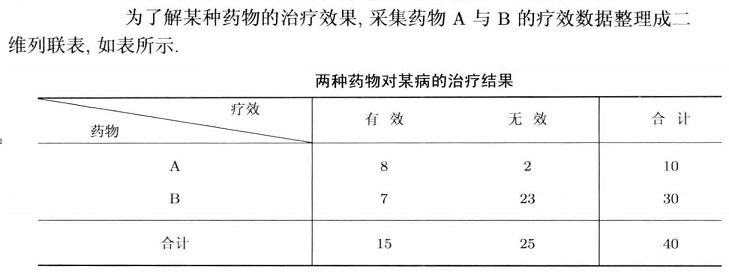

In [11]:
'''
此数据比较适合使用Fisher精确性检验。
结果显示p值小于0.05，拒绝比值相等的原假设，备择假设是'greater',
说明药物A的疗效要好于药物B。
'''
medicine=np.array([[8,2],[7,23]])
st.fisher_exact(medicine, alternative='greater')

(13.142857142857142, 0.002428599577306265)

### 8.5.3 Mantel-Haenszel检验
- #### 原理
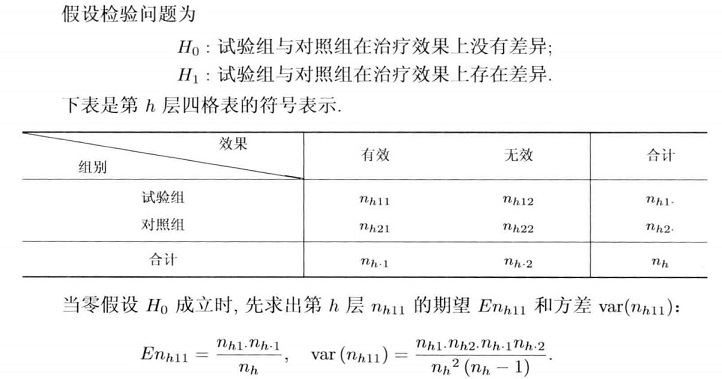
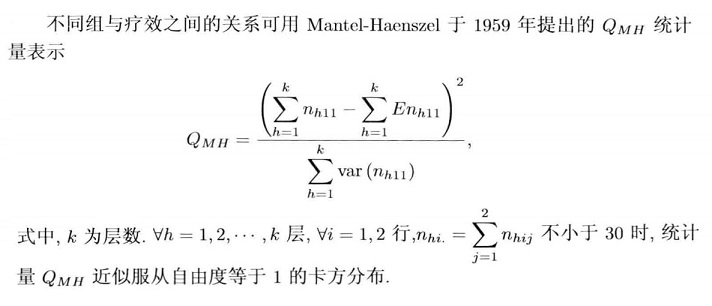

- #### 示例：
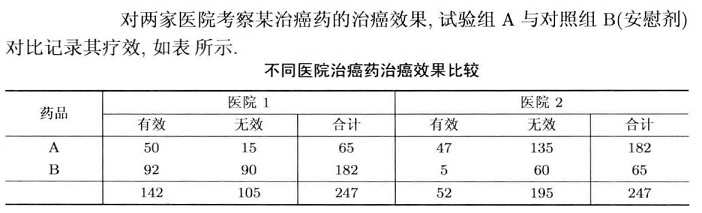

In [12]:
'''
根据公式计算Q值，然后使用自由度为1调用卡方分布的生存函数。
计算结果与R的函数mantelhaen.test有出入。
结论一样：p值远小于0.05，拒绝实验组和对照组治疗效果比值为1的原假设
，两种疗效存在差别。
'''
enh1=65*142/247
var1=65*182*142*105/((247**2)*(247-1))
enh2=182*52/247
var2=182*52*65*195/((247**2)*(247-1))
Q=((50+47-(enh1+enh2))**2)/(var1+var2)
print('Mantel-Haenszel检验统计量：',Q,'，p值：',st.chi2.sf(Q,1))

Mantel-Haenszel检验统计量： 23.011206159110337 ，p值： 1.6105983949463005e-06


### 8.5.4 对数线性模型
- #### 资料来源
使用Statsmodels的广义线性回归（GLM，泊松分布族，log连接函数）实现。具体内容参考：《非参数统计》第2版 第5.7节，王星、褚挺进。清华大学出版社 。<br>
列联表数据的分析以及对数线性模型，可以参看经典教材《属性数据分析引论》第7章，Alan Agresti著，高等教育出版社
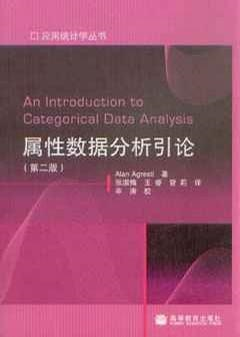
- #### 功能

列联表以假设检验为主要研究方法，只能反应事件的相对频率，不能反应事件的相对强度。对数线性模型(Log-linear model)则可进行参数估计和检验，特别是变量的取值之间有无关联、关联强度的测量等。

- #### 模型估计和检验
常用的统计量有两个：$Pearson$ $\chi^2$和对数似然比


- #### 三维列联表独立类型及其检验
独立类型：
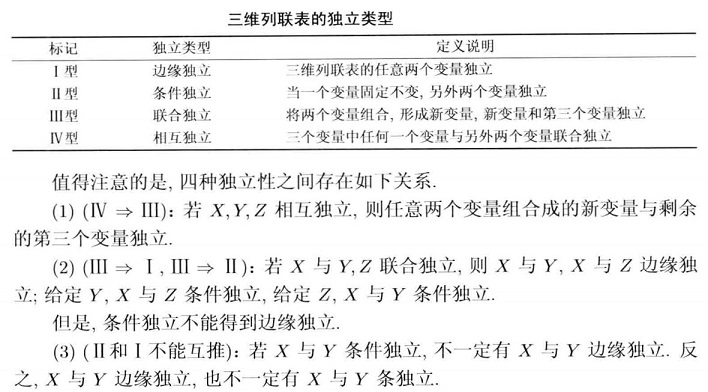
独立性检验：
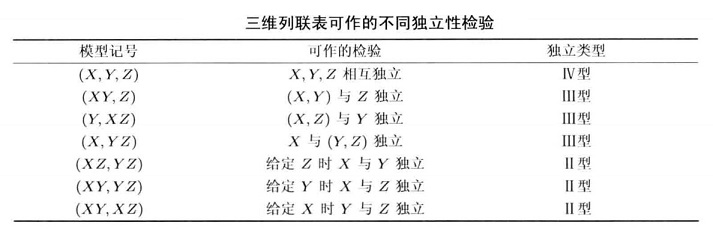

- #### 示例：
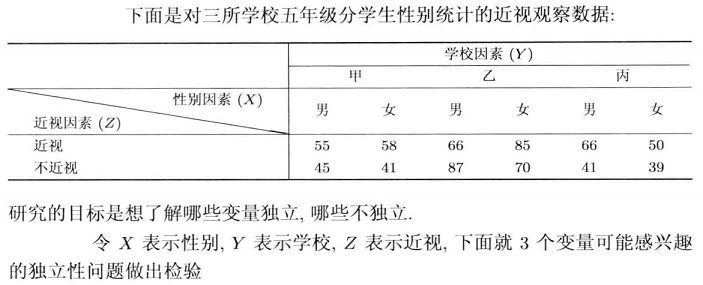


In [13]:
'''
对数线性模型
可以将三维列联表进行因子化，转换成plain数据，便于操作。
'''
###单元频数
count1=np.array([55,58,66,85,66,50,45,41,87,70,41,39],dtype='int')
### 近视因素，对近视与非近视进行因子化
f_myopia=np.array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N'])
###性别因素的因子化，M：男性，F：女性
f_gender=np.array(['M','F','M','F','M','F','M','F','M','F','M','F'])
###学校因素：甲、乙、丙
f_school=np.array(['A','A','B','B','C','C','A','A','B','B','C','C'])
#data=np.vstack([f_myopia ,f_gender ,f_school])
dic1={'count1':count1,'myopia':f_myopia,'gender':f_gender,'school':f_school}
###将数据（除单元频数外）放入一个DataFrame
d_dataframe=pd.DataFrame(dic1)


In [14]:
'''
（1）7种独立检验记号及其模型公式。
（2）使用count即单元频数作为因变量，然后根据独立检验类型构造自变量。
比如如果检验近视、性别和学校是否各自两两独立，即(X,Y,Z)检验类型，
通过C(gender,Sum)+C(school,Sum)+C(myopia,Sum)将近视、性别和学校三个因素转化成哑变量，
通过‘+’号连接。
（3）如若考察X与(Y,Z)的联合是否独立，则将C(school,Sum)*C(myopia,Sum)，
即使用‘*’号连接因素然后再与X通过‘+’号连接，即：C(gender,Sum)+C(school,Sum)*C(myopia,Sum)。
（4）其他公式依此类推。
'''
###(X,Y,Z)
formula1='count1 ~ C(gender)+C(school)+C(myopia)'
###(XY,Z)
formula2='count1 ~ C(myopia)+C(gender)*C(school)'
###(X,YZ)
formula3='count1 ~ C(gender)+C(school)*C(myopia)'
###(Y,XZ)
formula4='count1 ~ C(school)+C(myopia)*C(gender)'
###(XY,XZ)
formula5='count1 ~ C(gender)*C(school)+C(gender)*C(myopia)'
###(XY,YZ)
formula6='count1 ~ C(gender)*C(school)+C(school)*C(myopia)'
###(XZ,YZ)
formula7='count1 ~ C(gender)*C(myopia)+C(school)*C(myopia)'

###模型与公式
models=np.array(['(X, Y, Z)','(XY, Z)','(X, YZ)','(Y, XZ)','(XY, XZ)','(XY, YZ)','(XZ, YZ)'])
formulas=np.array([formula1,formula2,formula3,formula4,formula5,formula6,formula7])

In [15]:
df=[]#自由度
LRT=[]#对数似然比
LRT_p=[]#对似然比的p值
PQ=[]#Pearson Q值
PQ_p=[]#Pearson Q值的p值
conclusions=[]#独立与否的结论

###对上述7个模型的公式分别调用glm，广义线性模型（泊松分布族和log连接函数）
#Poisson()类构造器默认使用log连接函数
for formula in formulas:
    result=smf.glm(formula,data=d_dataframe,
                   family=sm.families.Poisson()).fit(use_t=True)
    LRT.append(np.round(result.deviance,6))#对数似然比=回归结果的偏差
    PQ.append(np.round(result.pearson_chi2,6))#Pearson Q等于结果中的Pearson卡方值
    #对数似然比的卡方检验p值
    LRT_p.append(np.round(st.chi2.sf(result.deviance,result.df_resid),8))
    df.append(result.df_resid)#自由度
    #Pearson Q统计量的卡方检验的p值
    q_p=st.chi2.sf(result.pearson_chi2,result.df_resid)
    
    ###根据Pearson Q统计量的卡方检验的p值判定是否独立。
    #设alpha=0.1，相对宽松的置信度。
    #也可以使用对数似然比的卡方检验p值判定是否独立。
    if q_p>=0.1:
        conclusions.append('独立')
    else:
        conclusions.append('不独立')
    PQ_p.append(np.round(q_p,8))

dic_data={'模型':models,'自由度':df,'LRT G2':LRT,'p值1':LRT_p,
          'Pearson Q':PQ,'p值2':PQ_p,'结论':conclusions}
goodness=pd.DataFrame(dic_data)
goodness

,模型,自由度,LRT G2,p值1,Pearson Q,p值2,结论
0,"(X, Y, Z)",7,12.174808,0.094955,12.115692,0.096818,不独立
1,"(XY, Z)",5,10.912539,0.053142,10.903892,0.053319,不独立
2,"(X, YZ)",5,6.360043,0.272744,6.346698,0.273930,独立
3,"(Y, XZ)",6,10.852045,0.093058,10.926133,0.090686,不独立
4,"(XY, XZ)",4,9.589775,0.047935,9.538042,0.048971,不独立
5,"(XY, YZ)",3,5.097773,0.164776,5.088329,0.165442,独立
6,"(XZ, YZ)",4,5.037279,0.283494,5.024954,0.284747,独立
